<a href="https://colab.research.google.com/github/senyonjohenry/Tomato-Leaf-Disease-Classification-Using-Efficient-Net-Model./blob/main/tomato_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
!pip install mlflow


In [59]:
!pip install pyngrok

In [60]:
import subprocess
from pyngrok import ngrok, conf
import getpass
from datetime import datetime
import mlflow

In [87]:
MLFLOW_TRACKING_URI = "sqlite:///mlflow.db"
subprocess.Popen(["mlflow", "ui", "--backend-store-uri", MLFLOW_TRACKING_URI])

<Popen: returncode: None args: ['mlflow', 'ui', '--backend-store-uri', 'sqli...>

In [102]:
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
# mlflow will create an experiment if it doesn't exist
experiment_name = "tomato"
run_name = datetime.now().strftime("%Y%m%d_%H%M%S")

In [92]:
print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth")
conf.get_default().auth_token = getpass.getpass()
port=5000
public_url = ngrok.connect(port).public_url
print(f' * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\"')

Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth
··········
 * ngrok tunnel "https://24a3-35-238-156-131.ngrok-free.app" -> "http://127.0.0.1:5000"


In [93]:
!pip install rarfile
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
import os
import rarfile
import tensorflow as tf
import mlflow
import mlflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import subprocess
from pyngrok import ngrok, conf
import getpass
from datetime import datetime


In [95]:
# Define paths
dataset_rar_path = "/content/drive/My Drive/tomato.rar"
extracted_dir_path = "/content/tomato"

# Create directory for extraction
os.makedirs(extracted_dir_path, exist_ok=True)

# Open and extract the dataset
with rarfile.RarFile(dataset_rar_path, 'r') as rf:
    rf.extractall(extracted_dir_path)

# Define directories
train_dir = os.path.join(extracted_dir_path, "tomato", "train")
valid_dir = os.path.join(extracted_dir_path, "tomato", "valid")


Displaying 5 images from each class in the train directory:


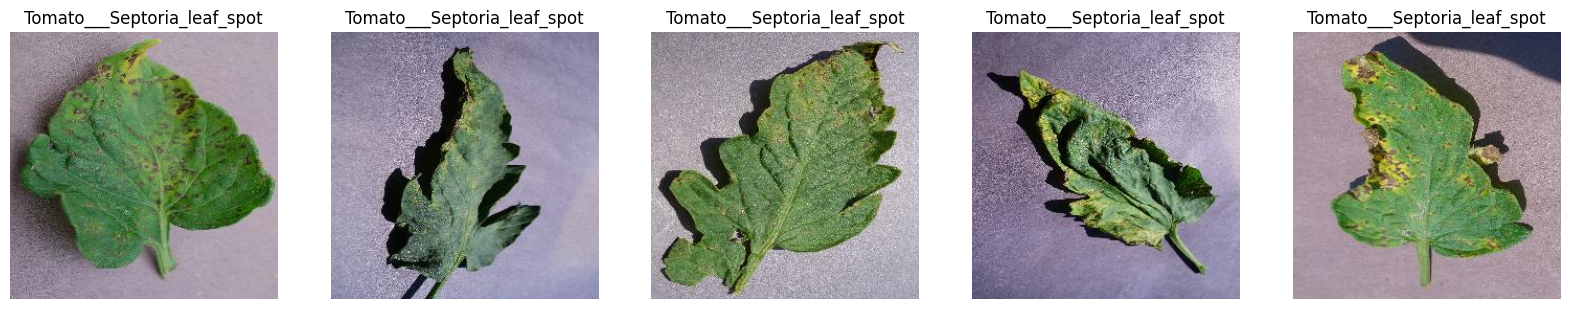

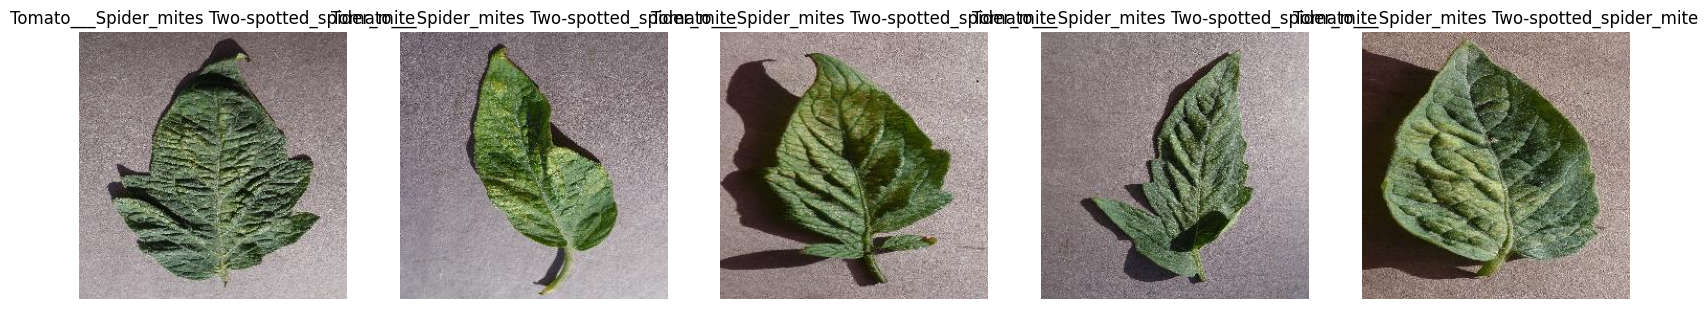

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def display_images(dataset_dir, num_images_per_class):
    # Get list of class folders
    class_folders = os.listdir(dataset_dir)

    # Plot the images
    for class_folder in class_folders:
        # Get list of image files in the class folder
        class_folder_path = os.path.join(dataset_dir, class_folder)
        image_files = os.listdir(class_folder_path)[:num_images_per_class]

        # Plot the images for this class
        fig, axes = plt.subplots(1, num_images_per_class, figsize=(num_images_per_class * 4, 4))
        for i, image_file in enumerate(image_files):
            # Open and display the image
            image_path = os.path.join(class_folder_path, image_file)
            image = Image.open(image_path)
            axes[i].imshow(image)
            axes[i].set_title(class_folder)  # Set class name as the title
            axes[i].axis('off')

        plt.show()

# Display 5 images from each class in the train directory
print("Displaying 5 images from each class in the train directory:")
display_images(train_dir, 5)

# Display 5 images from each class in the validation directory
print("Displaying 5 images from each class in the validation directory:")
display_images(valid_dir, 5)



In [69]:
import os
import numpy as np
from PIL import Image

def extract_colors(image_path):
    try:
        with Image.open(image_path) as img:
            # Convert the image to RGB mode if it's not already in RGB
            img = img.convert("RGB")
            # Resize the image to reduce computation time
            img = img.resize((100, 100))
            # Convert the image to a NumPy array
            img_array = np.array(img)
            # Reshape the array to a 2D array (pixels x 3 color channels)
            pixels = img_array.reshape(-1, 3)
            # Calculate the unique colors and their counts
            colors, counts = np.unique(pixels, axis=0, return_counts=True)
            # Combine colors and counts into a list of tuples
            color_counts = list(zip(counts, colors))
            # Sort the color counts in descending order
            color_counts.sort(reverse=True)
            return color_counts
    except Exception as e:
        print(f"Error extracting colors from {image_path}: {str(e)}")
        return None

def color_distribution_analysis(dataset_dir):
    color_counts = {}
    for filename in os.listdir(dataset_dir):
        img_path = os.path.join(dataset_dir, filename)
        try:
            colors = extract_colors(img_path)
            if colors is None:
                # Skip images without color information
                continue
            for color in colors:
                if color[1] not in color_counts:
                    color_counts[color[1]] = 0
                color_counts[color[1]] += 1
        except Exception as e:
            print(f"Error processing image {img_path}: {str(e)}")
            continue
    return color_counts

# Define directories
train_dir = os.path.join(extracted_dir_path, "tomato", "train")
valid_dir = os.path.join(extracted_dir_path, "tomato", "valid")

# Perform Color Distribution Analysis on the train directory
print("Performing Color Distribution Analysis on the train directory:")
color_distribution_train = color_distribution_analysis(train_dir)
print("Color distribution analysis on train directory:", color_distribution_train)

# Perform Color Distribution Analysis on the validation directory
print("Performing Color Distribution Analysis on the validation directory:")
color_distribution_valid = color_distribution_analysis(valid_dir)
print("Color distribution analysis on validation directory:", color_distribution_valid)


# Perform Color Distribution Analysis on the train directory
print("Performing Color Distribution Analysis on the train directory:")
color_distribution_analysis(train_dir)


Performing Color Distribution Analysis on the train directory:
Error extracting colors from /content/tomato/tomato/train/Tomato___Septoria_leaf_spot: [Errno 21] Is a directory: '/content/tomato/tomato/train/Tomato___Septoria_leaf_spot'
Error extracting colors from /content/tomato/tomato/train/Tomato___Spider_mites Two-spotted_spider_mite: [Errno 21] Is a directory: '/content/tomato/tomato/train/Tomato___Spider_mites Two-spotted_spider_mite'
Error extracting colors from /content/tomato/tomato/train/Tomato___healthy: [Errno 21] Is a directory: '/content/tomato/tomato/train/Tomato___healthy'
Error extracting colors from /content/tomato/tomato/train/Tomato___Leaf_Mold: [Errno 21] Is a directory: '/content/tomato/tomato/train/Tomato___Leaf_Mold'
Error extracting colors from /content/tomato/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus: [Errno 21] Is a directory: '/content/tomato/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus'
Error extracting colors from /content/tomato/tomato/tr

{}

Visualizing size distribution of images in the train directory:


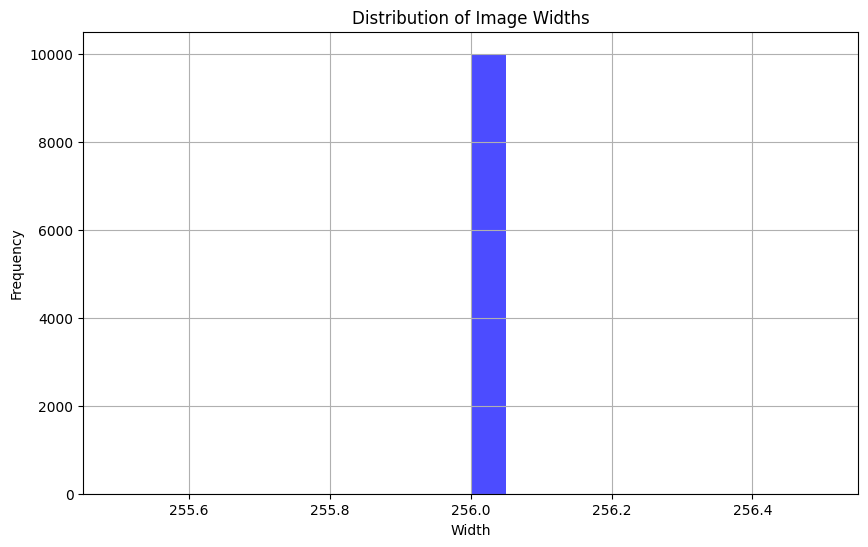

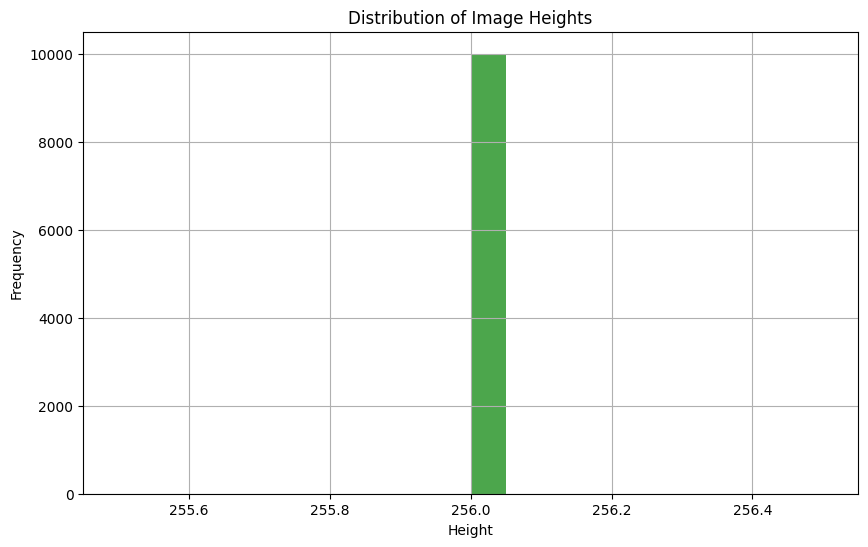

Visualizing size distribution of images in the validation directory:


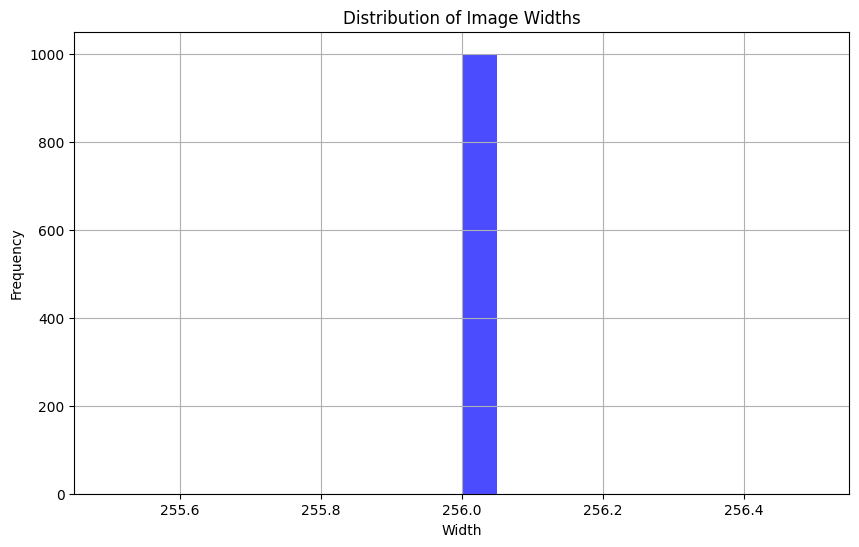

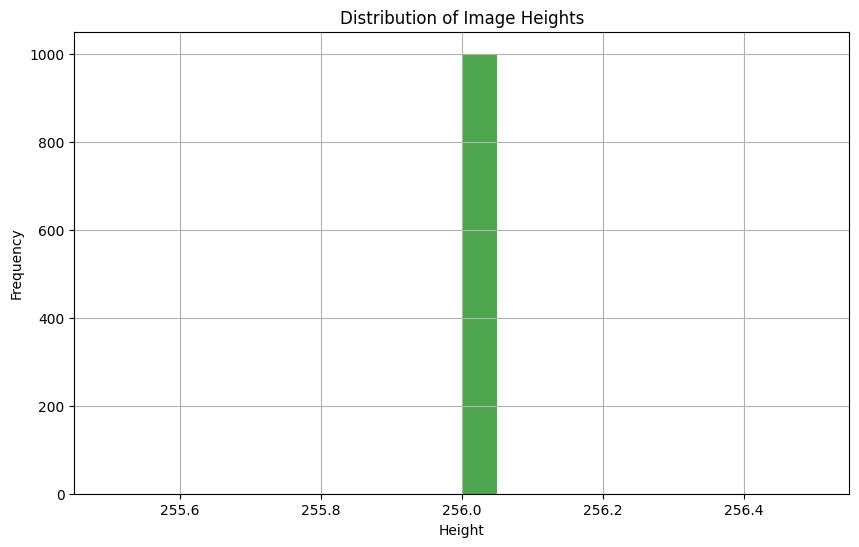

In [70]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def image_size_distribution(dataset_dir):
    # Get list of class folders
    class_folders = os.listdir(dataset_dir)

    # Initialize lists to store image sizes
    widths = []
    heights = []

    # Iterate over class folders and image files
    for class_folder in class_folders:
        class_folder_path = os.path.join(dataset_dir, class_folder)
        image_files = os.listdir(class_folder_path)
        for image_file in image_files:
            # Open the image and get its size
            image_path = os.path.join(class_folder_path, image_file)
            image = Image.open(image_path)
            width, height = image.size
            widths.append(width)
            heights.append(height)

    # Plot the histogram of image widths
    plt.figure(figsize=(10, 6))
    plt.hist(widths, bins=20, color='blue', alpha=0.7)
    plt.title('Distribution of Image Widths')
    plt.xlabel('Width')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Plot the histogram of image heights
    plt.figure(figsize=(10, 6))
    plt.hist(heights, bins=20, color='green', alpha=0.7)
    plt.title('Distribution of Image Heights')
    plt.xlabel('Height')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Call the function to visualize size distribution of images in the train directory
print("Visualizing size distribution of images in the train directory:")
image_size_distribution(train_dir)

# Call the function to visualize size distribution of images in the validation directory
print("Visualizing size distribution of images in the validation directory:")
image_size_distribution(valid_dir)


In [97]:
IMG_SIZE = 224
BATCH_SIZE = 64


In [98]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

valid_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess training dataset
train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Load and preprocess validation dataset
valid_dataset = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 8000 images belonging to 10 classes.
Found 0 images belonging to 10 classes.


In [103]:
# Start MLflow run
mlflow.end_run()

mlflow.start_run()
NUM_CLASSES = 10
# Define model architecture
model = Sequential([
    EfficientNetB0(
        include_top=True,
        weights=None,
        classes=NUM_CLASSES,
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
    ),
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


MlflowException: No Experiment with id=461482850514868453 exists

In [21]:
# Train the model
epochs = 8
history = model.fit(train_dataset, epochs=epochs, validation_data=valid_dataset)

# Log metrics to MLflow
mlflow.log_metric("accuracy", history.history['accuracy'][-1])



Epoch 1/8
125/125 [==============================] - 1396s 11s/step - loss: 2.3063 - accuracy: 0.3217
Epoch 2/8
125/125 [==============================] - 1397s 11s/step - loss: 1.3581 - accuracy: 0.5445
Epoch 3/8
125/125 [==============================] - 1358s 11s/step - loss: 0.9725 - accuracy: 0.6752
Epoch 4/8
125/125 [==============================] - 1362s 11s/step - loss: 0.8438 - accuracy: 0.7308
Epoch 5/8
125/125 [==============================] - 1371s 11s/step - loss: 0.6446 - accuracy: 0.7866
Epoch 6/8
125/125 [==============================] - 1363s 11s/step - loss: 0.5905 - accuracy: 0.8023
Epoch 7/8
125/125 [==============================] - 1351s 11s/step - loss: 0.5853 - accuracy: 0.8101
Epoch 8/8
125/125 [==============================] - 1345s 11s/step - loss: 0.4317 - accuracy: 0.8579


In [21]:
# Log the model to MLflow
mlflow.keras.log_model(model, "model")

# End MLflow run
mlflow.end_run()


2024/03/17 21:35:29 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2024/03/17 21:36:53 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpb1ca39_c/model, flavor: tensorflow). Fall back to return ['tensorflow==2.15.0', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback. 
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [49]:
import mlflow.keras



# Log the model
mlflow.keras.log_model(model, "efficientnet_model")

# Log metrics to MLflow
mlflow.log_metric("final_accuracy", history.history['accuracy'][-1])

# End MLflow run
mlflow.end_run()



KeyboardInterrupt: 

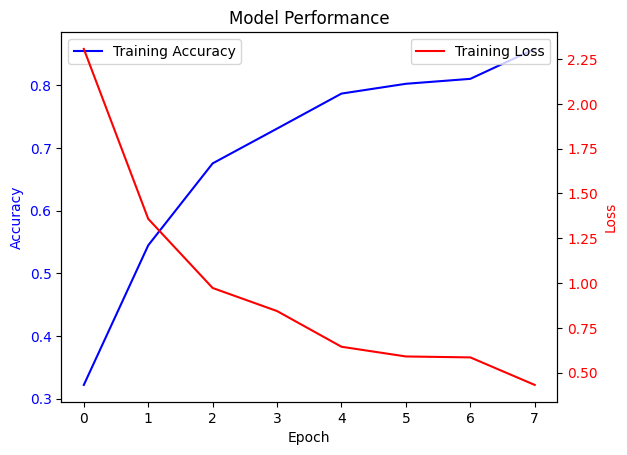

In [34]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax1 = plt.subplots()

# Plot training & validation accuracy values
ax1.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a second y-axis for loss
ax2 = ax1.twinx()
ax2.plot(history.history['loss'], label='Training Loss', color='red')
ax2.set_ylabel('Loss', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

plt.title('Model Performance')
plt.show()



In [43]:
!mlflow ui
import os
import mlflow

# Set MLflow tracking URI to point to your MLflow server
mlflow.set_tracking_uri("http://localhost:5000")  # Update with your MLflow server URI

# Start MLflow UI
os.system("mlflow ui")


[2024-03-18 10:56:19 +0000] [102014] [INFO] Starting gunicorn 21.2.0
[2024-03-18 10:56:19 +0000] [102014] [INFO] Listening at: http://127.0.0.1:5000 (102014)
[2024-03-18 10:56:19 +0000] [102014] [INFO] Using worker: sync
[2024-03-18 10:56:19 +0000] [102015] [INFO] Booting worker with pid: 102015
[2024-03-18 10:56:19 +0000] [102016] [INFO] Booting worker with pid: 102016
[2024-03-18 10:56:19 +0000] [102017] [INFO] Booting worker with pid: 102017
[2024-03-18 10:56:19 +0000] [102018] [INFO] Booting worker with pid: 102018

[2024-03-18 10:58:05 +0000] [102014] [INFO] Handling signal: int
Aborted!
[2024-03-18 10:58:05 +0000] [102015] [INFO] Worker exiting (pid: 102015)
[2024-03-18 10:58:05 +0000] [102016] [INFO] Worker exiting (pid: 102016)
[2024-03-18 10:58:05 +0000] [102017] [INFO] Worker exiting (pid: 102017)
[2024-03-18 10:58:05 +0000] [102018] [INFO] Worker exiting (pid: 102018)
[2024-03-18 10:58:06 +0000] [102014] [INFO] Shutting down: Master


2

In [48]:
import os

# Check the current working directory
print(os.getcwd())

# List the contents of the mlruns directory
print(os.listdir("mlruns"))


/content
['461482850514868453', '0', '.trash', 'models']


In [106]:
EPOCHS = 8
mlflow.set_experiment(experiment_name)
with mlflow.start_run(run_name = run_name) as mlflow_run:

    mlflow.set_experiment_tag("base_model", "MobileNet")
    mlflow.set_tag("optimizer", "keras.optimizers.Adam")
    mlflow.set_tag("loss", "sparse_categorical_crossentropy")


    mlflow.log_param("num_epochs", EPOCHS)
    mlflow.log_param("batch_size", BATCH_SIZE)
    mlflow.log_param("input_shape", (224, 224, 3))